In [1]:
from numpy import*
from pandas import*
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_df= read_csv(r"C:\Users\Asus\Downloads\gld_price_data.csv")

In [3]:
gold_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118



SPX= capatilization index of 500 companies,
GLD= Gold Price,
USO= united states oil,
SLV= silver price value,
ERU/USD= currency pair(euro to US doller ratio).


In [4]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#checking missing value
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
correlation= gold_df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

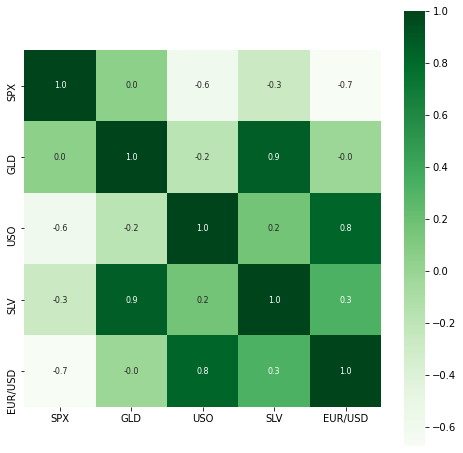

In [8]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [9]:
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

c:\python 39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

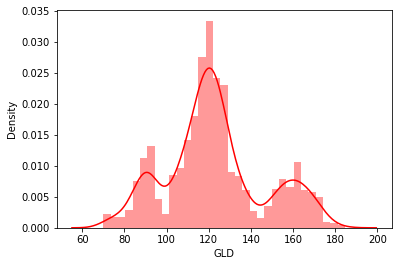

In [10]:
sns.distplot(gold_df['GLD'], color='red')

spliting the features

In [11]:
x=gold_df.drop(['Date', 'GLD'], axis=1)
y=gold_df['GLD']
x


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [12]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [13]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.2, random_state=2)

Model training: Random Forest Regressor

In [14]:
fore_reg= RandomForestRegressor(n_estimators=100)

In [15]:
fore_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
test_data_prediction= fore_reg.predict(X_test)
test_data_prediction

array([168.76199979,  81.98819993, 115.85409983, 127.59010068,
       120.74800159, 154.61979763, 150.27209897, 126.02170013,
       117.32399878, 126.00460074, 116.68000098, 170.81480055,
       141.85159825, 168.05099879, 115.41889964, 117.72860062,
       138.55720336, 170.22990111, 159.54680294, 158.80669895,
       155.19490014, 125.49540048, 175.4629997 , 156.77120304,
       125.25440041,  93.79719998,  77.2463999 , 120.56510008,
       119.08039886, 167.52919966,  88.21990023, 125.2341001 ,
        91.1420007 , 117.64900051, 121.15929936, 136.7617005 ,
       115.47660145, 114.90580079, 147.85110031, 107.37230072,
       104.25070216,  87.14009784, 126.54730066, 118.14520019,
       152.82719941, 119.54770033, 108.45300009, 108.28309855,
        93.117401  , 126.9658984 ,  74.82320024, 113.72859964,
       121.39710026, 111.31359943, 118.87479907, 120.82149977,
       159.45569941, 168.94990087, 147.02269665,  85.78079819,
        94.35990042,  86.70159891,  90.71000012, 118.92

In [17]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
error_score

0.9891956081400102

Compare the actual and predicted value in a plot

In [18]:
Y_test= list(Y_test)


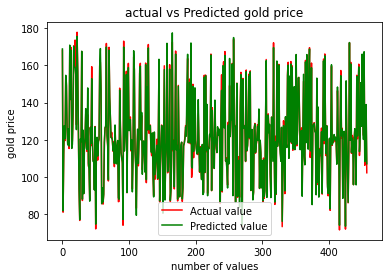

In [19]:
plt.plot(Y_test, color="red", label= "Actual value")
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title("actual vs Predicted gold price")
plt.xlabel('number of values')
plt.ylabel('gold price ')
plt.legend()
plt.show()